In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('num_booking_status.csv')
data.keys()

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [51]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sb
import numpy as np
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

def get_corr(df):
    plt.rcParams["figure.figsize"] = (10, 10)
    sb.heatmap(df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Blues', #색상
           vmin = -1, vmax=1, #컬러차트 영역 -1 ~ +1
          )
    print()
    
def draw_pairplot(df, keys, hue):
    sb.pairplot( data=df, vars=(keys), plot_kws=dict(alpha=0.1), hue=hue )
    print()
    
def get_standard_norm(series):
    # price = price.loc[outlier:len(data)-outlier, :]
    mean = np.mean(series)   # 17.41
    std = np.std(series)     # 2.94

    price_pdf = stats.norm.pdf(series.sort_values(), mean, std)

    plt.plot(series.sort_values(), price_pdf, color="Black", label="Cultivar_A")
    sb.histplot(data = series, color="Black",stat = "probability",alpha=0.3)


,meal_type_1,meal_type_2,meal_type_3,meal_type_4,2+3+4,avg_price_per_room,booking_status
0,1.0,0.0,0.0,0.0,0.0,90.95,1
1,1.0,0.0,0.0,0.0,0.0,90.95,1
2,1.0,0.0,0.0,0.0,0.0,99.45,0
3,1.0,0.0,0.0,0.0,0.0,91.00,0
4,1.0,0.0,0.0,0.0,0.0,82.28,0
...,...,...,...,...,...,...,...
25387,1.0,0.0,0.0,0.0,0.0,55.00,0
25388,0.0,1.0,0.0,0.0,1.0,80.00,1
25389,1.0,0.0,0.0,0.0,0.0,110.00,0
25390,1.0,0.0,0.0,0.0,0.0,130.00,1


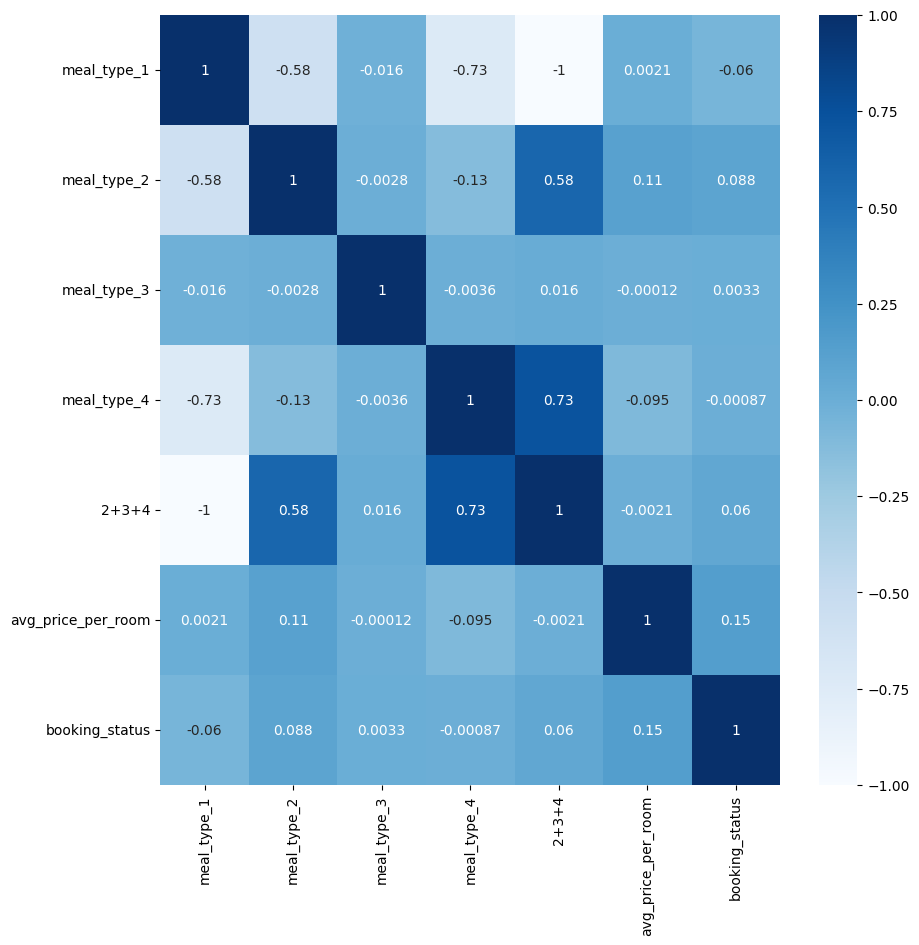

In [34]:
import seaborn as sns

ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
train_cat = ohe.fit_transform(data[['type_of_meal_plan']])
train_cat = pd.DataFrame(train_cat)
df = pd.DataFrame()
df['meal_type_1'] = train_cat.loc[:, 0]
df['meal_type_2'] = train_cat.loc[:, 1]
df['meal_type_3'] = train_cat.loc[:, 2]
df['meal_type_4'] = train_cat.loc[:, 3]
df['2+3+4'] = train_cat.loc[:, 1] + train_cat.loc[:, 2] + train_cat.loc[:, 3]
df['avg_price_per_room'] = data['avg_price_per_room']
df['booking_status'] = data['booking_status']
df

# draw_pairplot(df, df.keys(), 'booking_status')
# print()
get_corr(df)
df

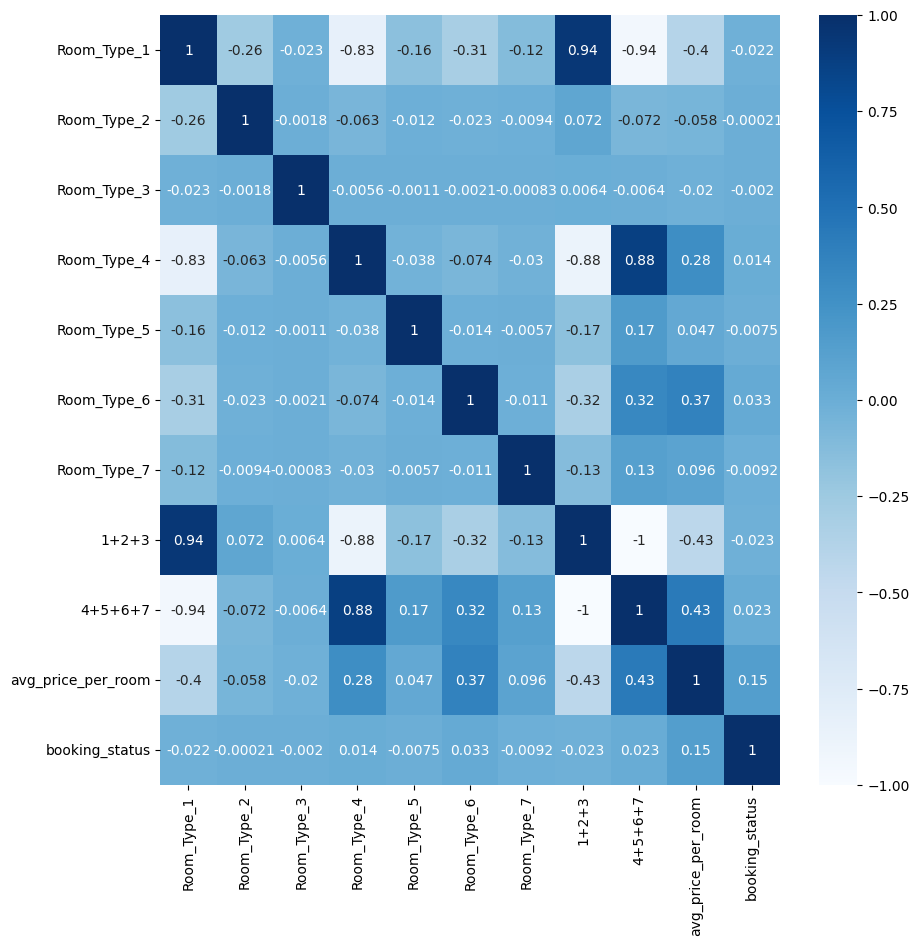

In [36]:
ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
train_cat = ohe.fit_transform(data[['room_type_reserved']])
train_cat = pd.DataFrame(train_cat)
df = pd.DataFrame()
df['Room_Type_1'] = train_cat.loc[:, 0]
df['Room_Type_2'] = train_cat.loc[:, 1]
df['Room_Type_3'] = train_cat.loc[:, 2]
df['Room_Type_4'] = train_cat.loc[:, 3]
df['Room_Type_5'] = train_cat.loc[:, 4]
df['Room_Type_6'] = train_cat.loc[:, 5]
df['Room_Type_7'] = train_cat.loc[:, 6]
df['1+2+3'] = train_cat.loc[:, 0] + train_cat.loc[:, 1] + train_cat.loc[:, 2]
df['4+5+6+7'] = train_cat.loc[:, 3] + train_cat.loc[:, 4] + train_cat.loc[:, 5] + train_cat.loc[:, 6]
df['avg_price_per_room'] = data['avg_price_per_room']
df['booking_status'] = data['booking_status']
df

get_corr(df)

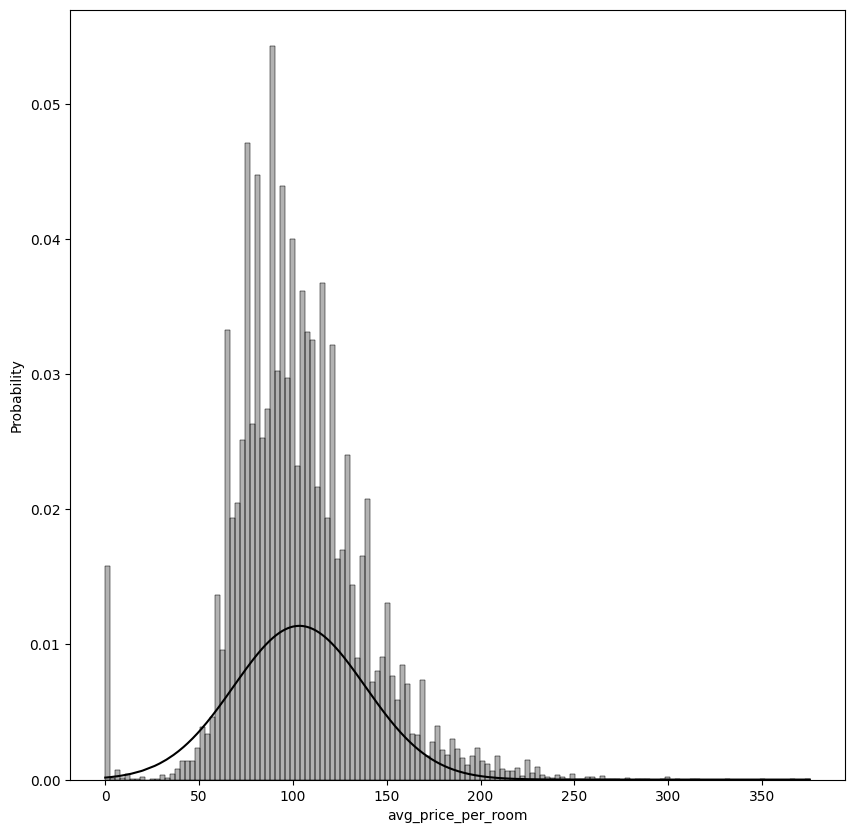

In [52]:

get_standard_norm(data['avg_price_per_room'])

In [111]:
from sklearn.preprocessing import StandardScaler

sdscaler = StandardScaler()
lead_time = data['lead_time']

lead_time_norm = sdscaler.fit_transform([lead_time])
# scaler.fit_transform([data['lead_time']])

print("변환된 후 크기: {}".format(lead_time_norm.shape))
print("스케일 조정 전 특성별 최소값:\n {}".format(data['lead_time'].min(axis=0)))
print("스케일 조정 전 특성별 최대값:\n {}".format(data['lead_time'].max(axis=0)))
print("스케일 조정 후 특성별 최소값:\n {}".format(lead_time_norm.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n {}".format(lead_time_norm.max(axis=0)))
df.describe()

0        200
1         79
2         78
3         61
4        201
        ... 
25387     43
25388    102
25389      5
25390    213
25391     14
Name: lead_time, Length: 25392, dtype: int64
변환된 후 크기: (1, 25392)
스케일 조정 전 특성별 최소값:
 0
스케일 조정 전 특성별 최대값:
 443
스케일 조정 후 특성별 최소값:
 [0. 0. 0. ... 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [0. 0. 0. ... 0. 0. 0.]


KeyboardInterrupt: 